# K-Means, 샘플데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [12]:
import warnings
warnings.filterwarnings('ignore')

### 데이터 준비
- 샘플데이터 만들어서 사용

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  centers=3, 
                  n_features=2, 
                  cluster_std=0.5,
                  random_state=0)


In [5]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [6]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

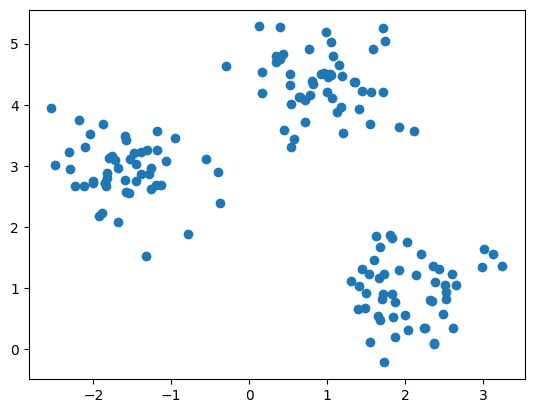

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### 학습

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=2022)
km.fit(X)    #비지도 학습이라 y값이 없음


KMeans(n_clusters=3, random_state=2022)

In [11]:
y_pred = km.predict(X)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0])

In [14]:
df = pd.DataFrame(X, columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


In [15]:
df['y_pred'] = y_pred
df.head()

,X_1,X_2,y_pred
0,2.605097,1.225296,0
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,0


In [18]:
centroid = km.cluster_centers_
centroid

array([[ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712],
       [-1.5947298 ,  2.92236966]])

<AxesSubplot: xlabel='X_1', ylabel='X_2'>

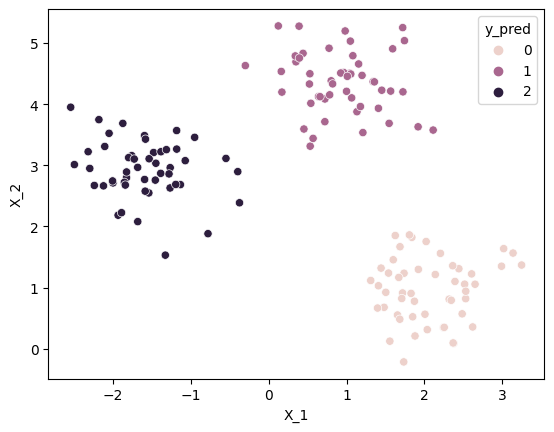

In [16]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_pred')
plt.scatter()

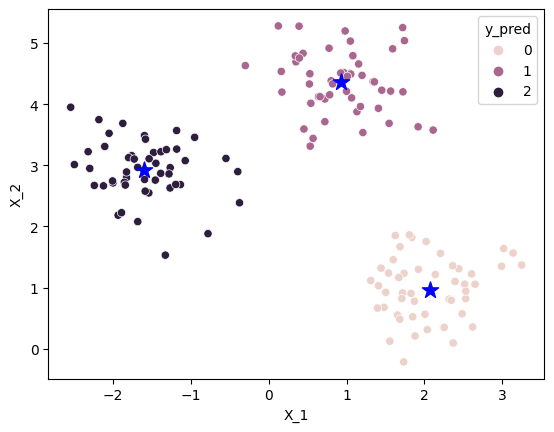

In [26]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_pred')
plt.scatter(centroid[:,0], centroid[:,1],
           s=150, marker='*', c='blue')

### elbow method

In [29]:
inertia = []

for k in range(2, 11):
    # fit
    # km.inertia_
    # append
    km = KMeans(n_clusters=k, random_state=2022)
    km.fit(X) 
    inertia.append(km.inertia_)
    
print(inertia)    

[283.46101780209307, 72.47601670996698, 62.84061768542222, 54.29757489773776, 47.85292137212694, 39.88978825654857, 35.70304272594484, 30.624470574346063, 26.97109816223398]


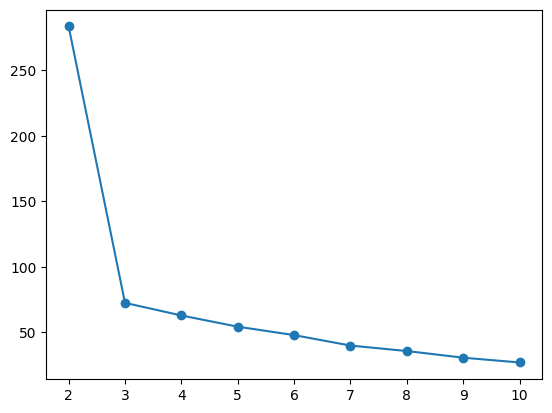

In [30]:
plt.plot(range(2,11), inertia, marker='o')
plt.show()

# iris 데이터를 사용하여 Kmeans

# 데이터 읽어오기

In [31]:
from sklearn import datasets

iris = datasets.load_iris()

In [32]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [36]:
X = df.drop(['petal length (cm)'], axis=1)

In [37]:
X

,sepal length (cm),sepal width (cm),petal width (cm)
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [38]:
X = df.drop(['petal width (cm)'], axis=1)

In [40]:
iris = X.drop(['petal length (cm)'], axis=1)

In [41]:
iris

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [42]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=2022)
km.fit(iris) 

KMeans(n_clusters=3, random_state=2022)

In [43]:
y_pred = km.predict(iris)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [45]:
df = pd.DataFrame(iris, columns=['sepal length (cm)', 'sepal width (cm)'])
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [46]:
df['y_pred'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),y_pred
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

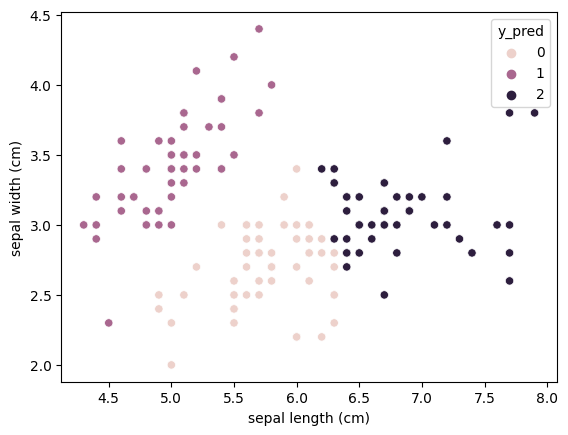

In [50]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='y_pred')